In [36]:
import warnings
warnings.filterwarnings('ignore')

import gymnasium as gym
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.grid_search import GridSearch

In [4]:
def visualize_policy(policy):
    fig, ax = plt.subplots()
    ax.matshow(np.eye(10, 10)[np.arange(10) , :], cmap='viridis')

    for i in range(10):
        for j in range(10):
            print()
            action = policy.get((i + 2, j + 1, False), "H")
            ax.text(j, i, action, va='center', ha='center')

    plt.xlim(-0.5, 9.5)
    plt.ylim(9.5, -0.5)
    plt.gca().invert_yaxis()
    plt.show()

In [6]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

In [9]:
transition_matrix = blackjack.P

In [11]:
len(transition_matrix)

290

In [18]:
print(transition_matrix[0])

{0: [(0.6463918636046386, -1, -1.0, True), (0.35360813639536137, -1, 1.0, True)], 1: [(0.07692307692307693, 20, 0.0, False), (0.07692307692307693, 30, 0.0, False), (0.07692307692307693, 40, 0.0, False), (0.07692307692307693, 50, 0.0, False), (0.07692307692307693, 60, 0.0, False), (0.07692307692307693, 70, 0.0, False), (0.07692307692307693, 80, 0.0, False), (0.07692307692307693, 90, 0.0, False), (0.3076923076923077, 100, 0.0, False), (0.07692307692307693, 210, 0.0, False)]}


In [199]:
gamma_value = 0.7
n_iters_value=1000
theta_value=1e-10

In [200]:
# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=gamma_value, n_iters=n_iters_value, theta=theta_value)

runtime = 0.02 seconds


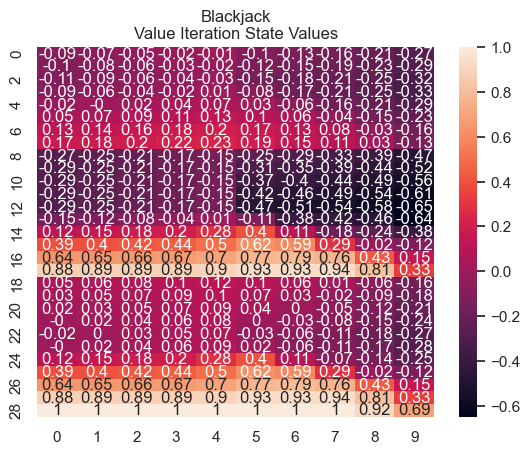

In [73]:
blackjack_map_size=(29, 10)
Plots.values_heat_map(V, "Blackjack\nValue Iteration State Values", blackjack_map_size)

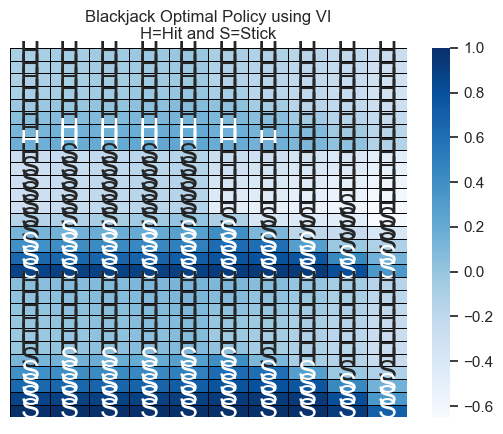

In [74]:
#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
title="Blackjack Optimal Policy using VI\nH=Hit and S=Stick"
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

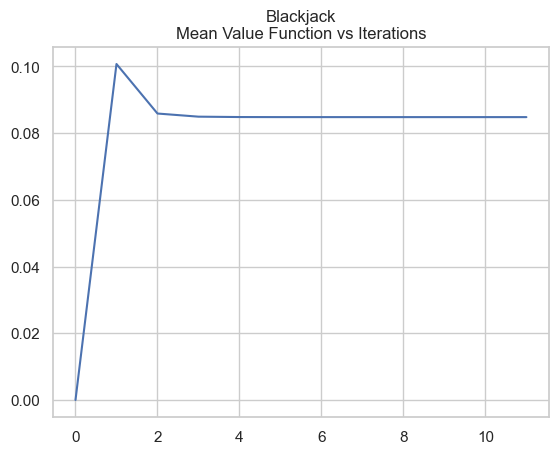

In [75]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Blackjack\nMean Value Function vs Iterations")

In [76]:
#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

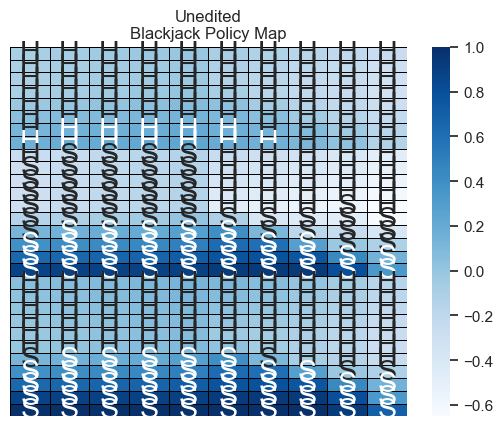

In [77]:
#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

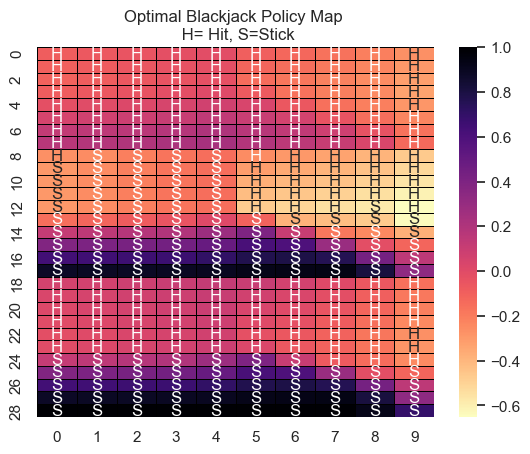

In [81]:
from bettermdptools.utils.decorators import add_to

@add_to(Plots)
@staticmethod
def modified_plot_policy(val_max, directions, map_size, title):
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"
    plt.show()

title = "Optimal Blackjack Policy Map \n H= Hit, S=Stick"
Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)

In [79]:
gamma=[.7]
n_iters=[500]
theta=[ 0.001, .00001]

In [61]:
GridSearch.vi_grid_search(blackjack, gamma, n_iters, theta)

running VI with gamma: 0.7  n_iters: 500  theta: 0.001
runtime = 0.01 seconds
Avg. episode reward:  -0.09
###################
running VI with gamma: 0.7  n_iters: 500  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  -0.13
###################


In [201]:
#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

-0.03


## Policy Iteration

In [204]:
gamma_pi_value = 0.7
n_iters_pi_value=100
theta_pi_value=.00001

In [211]:
V_pi, V_track_pi, policy_Pi = Planner(blackjack.P).policy_iteration(gamma=gamma_pi_value, n_iters=n_iters_pi_value, theta=theta_pi_value)

runtime = 0.02 seconds


In [216]:
#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=policy_Pi, user_input=False)
print(np.mean(test_scores))

-0.09


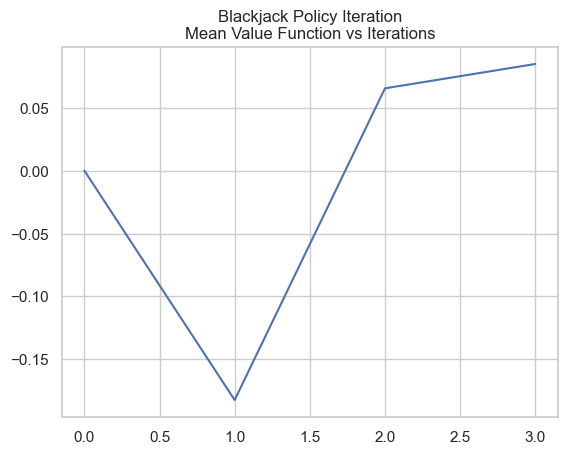

In [198]:
max_value_pi_per_iter = np.trim_zeros(np.mean(V_track_pi, axis=1), 'b')
Plots.v_iters_plot(max_value_pi_per_iter, "Blackjack Policy Iteration\nMean Value Function vs Iterations")

In [133]:
#get formatted state values and policy map
val_pi_max, policy_pi_map = Plots.get_policy_map(policy_Pi, V_pi, blackjack_actions, blackjack_map_size)

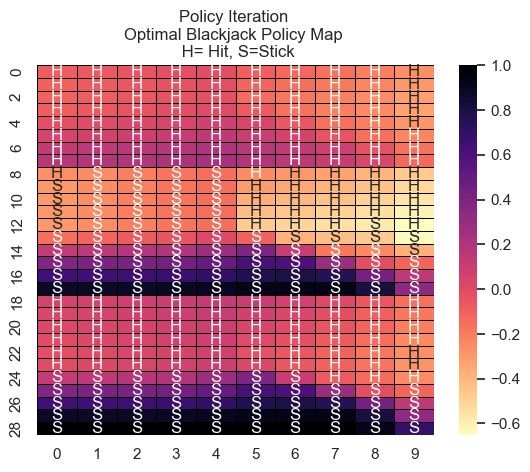

In [134]:
title_pi = "Policy Iteration \nOptimal Blackjack Policy Map \n H= Hit, S=Stick"
Plots.modified_plot_policy(val_pi_max, policy_pi_map, blackjack_map_size, title_pi)

In [128]:
gamma=[.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]
n_iters=[500]
theta=[ .00001]

In [129]:
GridSearch.pi_grid_search(blackjack, gamma, n_iters, theta)

running PI with gamma: 0.2  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  -0.02
###################
running PI with gamma: 0.3  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  -0.01
###################
running PI with gamma: 0.4  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  0.12
###################
running PI with gamma: 0.5  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  0.08
###################
running PI with gamma: 0.6  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  0.03
###################
running PI with gamma: 0.7  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  0.02
###################
running PI with gamma: 0.8  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  -0.29
###################
running PI with gamma: 0.9  n_iters: 500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  0.07
#################

## Q Learning 

In [ ]:
gamma_q_value=.7
epsilon_decay_q_value = 0.1
iters_q_value = 100000

In [217]:
# Q-learning
Q, qlearn_V, qlearn_pi, Q_track, qlearn_pi_track = RL(blackjack).q_learning(gamma=.99, epsilon_decay_ratio=0.9,
                   n_episodes=100000)

runtime = 12.13 seconds


In [218]:
#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=qlearn_pi, user_input=False)
print(np.mean(test_scores))

-0.06


In [182]:
type(Q_track)

numpy.ndarray

In [183]:
Q_track.shape

(100000, 290, 2)

In [189]:
#get formatted state values and policy map
val_qlearn_max, policy_qlearn_map = Plots.get_policy_map(qlearn_pi, qlearn_V, blackjack_actions, blackjack_map_size)

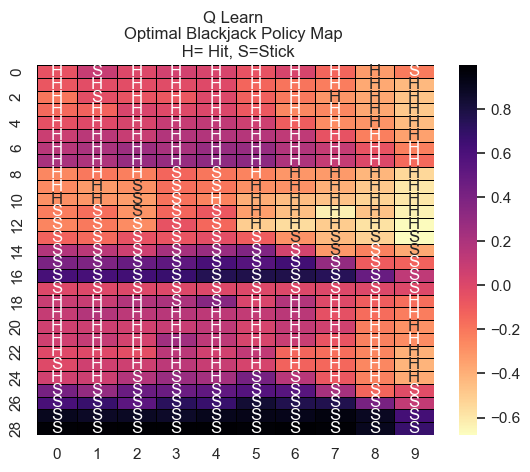

In [190]:
title_qlearn = "Q Learn \nOptimal Blackjack Policy Map \n H= Hit, S=Stick"
Plots.modified_plot_policy(val_qlearn_max, policy_qlearn_map, blackjack_map_size, title_qlearn)

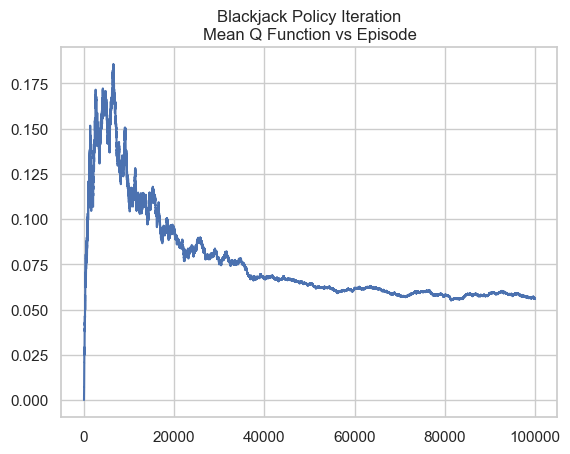

In [191]:
mean_Q_per_episode = np.mean(np.max(Q_track,axis=2), axis =1)

Plots.v_iters_plot(mean_Q_per_episode, "Blackjack Policy Iteration\nMean Q Function vs Episode")
#for a in Q_track:
#    Qv_track.append(np.max(a, axis=1))

In [175]:
gamma=[.7]
epsilon_decay = [0.001, 0.009,0.01, 0.09, 0.1, 0.9, 0.99 ]
iters = [100000]
GridSearch.q_learning_grid_search(blackjack, gamma, epsilon_decay, iters)

running q_learning with gamma: 0.7 epsilon decay: 0.001  iterations: 100000


runtime = 12.80 seconds
Avg. episode reward:  -0.07
###################
running q_learning with gamma: 0.7 epsilon decay: 0.009  iterations: 100000


runtime = 12.96 seconds
Avg. episode reward:  -0.04
###################
running q_learning with gamma: 0.7 epsilon decay: 0.01  iterations: 100000


runtime = 12.60 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.7 epsilon decay: 0.09  iterations: 100000


runtime = 12.38 seconds
Avg. episode reward:  -0.13
###################
running q_learning with gamma: 0.7 epsilon decay: 0.1  iterations: 100000


runtime = 12.36 seconds
Avg. episode reward:  0.01
###################
running q_learning with gamma: 0.7 epsilon decay: 0.9  iterations: 100000


runtime = 12.15 seconds
Avg. episode reward:  -0.03
###################
running q_learning with gamma: 0.7 epsilon decay: 0.99  iterations: 100000


runtime = 12.28 seconds
Avg. episode reward:  -0.02
###################
